In [1]:
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline

# Metric 1: Parks

I read all three of the different csvs and then did a groupby and count to get a list that contains every different kind of field, playground, court, and rinks that is in each neighborhood. 

In [5]:
rec = pd.read_csv("City of Pittsburgh Playing Fields.csv", index_col = "id")
numrec = rec.groupby('neighborhood').count()
playground = pd.read_csv("Playgrounds.csv")
play = playground.groupby('neighborhood').count()

#Combined the two different dataframes together through concatenation
recreation = pd.concat([numrec, play])
court = pd.read_csv("Courts and Rinks.csv")
court = court.groupby('neighborhood').count()

#Did a second concatenation to have all sets needed combined
recreation = pd.concat([recreation, court])['park']
recreation = pd.DataFrame(recreation)
recreation

,park
neighborhood,
Allegheny Center,2
Allentown,1
Arlington,1
Banksville,2
Bedford Dwellings,2
...,...
Terrace Village,5
Troy Hill,8
Upper Hill,1


Below, I did my final sort so that it only displays neighborhood and together the duplicates to create an accurate count. Then I use sort_values() to sort the neighborhoods by the number of parks instead of by alphabetical order.

In [6]:
recreation = recreation.groupby('neighborhood').sum()
recreation.sort_values(by=['park'], ascending=False)

,park
neighborhood,
Squirrel Hill South,39
Highland Park,28
Hazelwood,17
South Side Slopes,17
Brookline,17
...,...
Homewood South,1
Homewood North,1
West Oakland,1


In [10]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile

In [11]:
rec_map = neighborhoods.merge(recreation, how='left', left_on='hood', right_on='neighborhood') # combined the list with the map

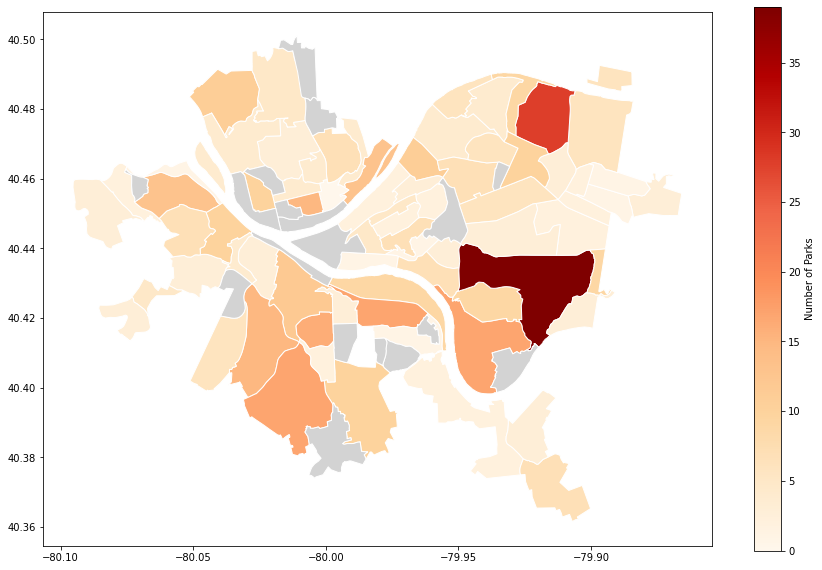

In [12]:
rec_map.plot(column='park', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

I read in another csv and then masked it so that I don't get any answers that are infinity from dividing. Afterward I created a list using groupby and sum, and then merged with the previous recreation dataframe.

In [13]:
area = pd.read_csv("Neighborhood Size.csv")

In [14]:
# to remove any areas that have 0 or less
mask = area['acres'] > 0
area = area[mask]

In [15]:
# made a list by groupby and sum, and then changed it into a dataframe
area = area.groupby('hood').sum()['acres']
newarea = pd.DataFrame(area)

In [16]:
# reset index so easier to merge
recreation = recreation.reset_index()
newarea = newarea.reset_index()
reca = newarea.merge(recreation, left_on="hood", right_on ="neighborhood")

In [17]:
# removed unecessary labels
reca.drop(labels = 'neighborhood', axis = 1)

,hood,acres,park
0,Allegheny Center,134.703,15
1,Allentown,189.608,3
2,Arlington,302.320,1
3,Banksville,622.919,6
4,Bedford Dwellings,115.252,5
...,...,...,...
66,Upper Lawrenceville,260.349,6
67,West End,128.679,4
68,West Oakland,138.372,1
69,Westwood,445.009,3


I calculated the parks per acre and then combined it with the dataframe. Afterward, i created a chloropleth map. 

In [18]:
# created a list of parks per acre and then combined with previous dataframe
recbyarea = reca['park'] / reca['acres']
recbyarea = pd.DataFrame(recbyarea, columns = ["parks per acre"])
reca = reca.merge(recbyarea, left_index=True, right_index=True)

In [20]:
reca

,hood,acres,neighborhood,park,parks per acre
0,Allegheny Center,134.703,Allegheny Center,15,0.111356
1,Allentown,189.608,Allentown,3,0.015822
2,Arlington,302.320,Arlington,1,0.003308
3,Banksville,622.919,Banksville,6,0.009632
4,Bedford Dwellings,115.252,Bedford Dwellings,5,0.043383
...,...,...,...,...,...
66,Upper Lawrenceville,260.349,Upper Lawrenceville,6,0.023046
67,West End,128.679,West End,4,0.031085
68,West Oakland,138.372,West Oakland,1,0.007227
69,Westwood,445.009,Westwood,3,0.006741


In [21]:
#sorted by parks per acre instead of alphabetically
reca.sort_values(by = ['parks per acre'], ascending=False)

,hood,acres,neighborhood,park,parks per acre
0,Allegheny Center,134.703,Allegheny Center,15,0.111356
50,Regent Square,123.682,Regent Square,9,0.072767
6,Beltzhoover,270.374,Beltzhoover,16,0.059177
39,Manchester,179.566,Manchester,10,0.055690
64,Troy Hill,247.170,Troy Hill,13,0.052595
...,...,...,...,...,...
32,Homewood North,279.140,Homewood North,1,0.003582
2,Arlington,302.320,Arlington,1,0.003308
47,Point Breeze,645.695,Point Breeze,2,0.003097
29,Hays,1125.478,Hays,2,0.001777


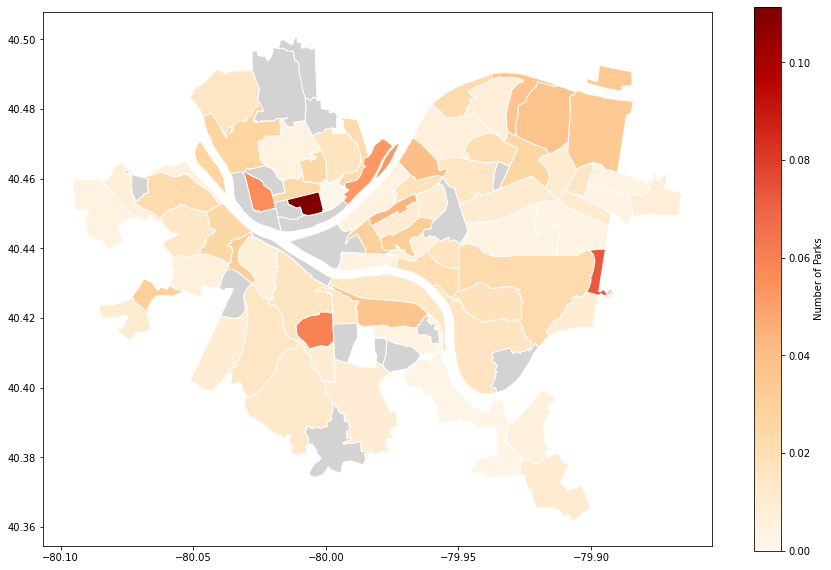

In [22]:
# created a map
rec_map = neighborhoods.merge(reca, how='left', left_on='hood', right_on='hood')
rec_map.plot(column='parks per acre', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Parks"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

# Conclusion
Compiling all the data, we found that Squirrel Hill South has the most  